In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
fc_df = pd.read_csv('https://raw.githubusercontent.com/Rdenerville/finalcapstone/master/Exit_FCS_1.csv')

# Data Background Information

The data I have chosen to use is a series of columns with rows displaying the amount of scheduled and unscheduled Ambulatory Surgery/Pre-Admissions Visits from EPIC Insurance Verification Workqueues assigned to Hospital Care Investigators (also known as Financial Counselors).


*   694 visits and patients
*   This data is for the month of August, suggesting that all visits have been assigned to HCI's from August 2 to August 29, 2020.
*   694 rows and 22 columns are present
*   All visits in this data may contain an insurance carrier.





In [3]:
fc_df.head()

,wq_owning_area,wq_id_number,facility,wq_name,visit_number,patient_name,mrn,expected_admission_date,admit_date,discharge_date,patient_class,primary_coverage,primary_verification_status,primary_verification_date,precertification_status,precertification _status_edit_time,time_spent_in_wq,exit_prior_to_service_date,exit_date,entry_time,creation_visit_date,secure_rate
0,Insurance Verification,11983,SE,SE HCI AUTH/CERT PREADMISSIONS AND SURGERIES,71568,Lalo Enderlein,100,NaN,NaN,NaN,Hospital Outpatient Surgery,HEALTHFIRST MCR / HEALTHFIRST LIFE IMPROVEMENT...,E-Verified,8/1/2020,Not Needed Outpatient,NaN,04d 17h 59m,27,8/4/2020 0:00,7/30/2020 16:55,7/30/2020 0:00,True
1,Insurance Verification,8562,HH,HH HCI AUTH/CERT PRE-ADMISSIONS AND SURGERIES 1,62596,Malina Stables,101,8/18/2020,8/18/2020,8/18/2020,Hospital Outpatient Surgery,NEW YORK MEDICAID / MEDICAID FFS,E-Verified,8/20/2020,Not Needed Outpatient,7/14/2020,19d 18h 04m,16,8/2/2020 0:00,7/13/2020 16:37,7/13/2020 0:00,True
2,Insurance Verification,8589,SA,SA HCI AUTH/CERT PRE-ADMISSIONS AND SURGERIES 1,35177,Magdalena McCartan,102,8/10/2020,8/10/2020,8/10/2020,Hospital Outpatient Surgery,METROPLUS MCD / METROPLUS MEDICAID,E-Verified,8/4/2020,Not Needed Outpatient,6/22/2020,42d 20h 26m,6,8/4/2020 0:00,6/22/2020 13:47,6/22/2020 0:00,True
3,Insurance Verification,11984,PH,PH HCI AUTH/CERT PREADMISSIONS AND SURGERIES,61891,Derrik McNulty,103,8/11/2020,8/11/2020,8/12/2020,Inpatient,HEALTHFIRST MCD / HEALTHFIRST MEDICAID MC,E-Verified,8/2/2020,UM - Clinical Review Complete,7/27/2020,07d 04h 06m,8,8/3/2020 0:00,7/27/2020 11:06,7/27/2020 0:00,True
4,Insurance Verification,9420,HH,HH HCI AUTH/CERT PRE-ADMISSIONS AND SURGERIES 2,77443,Percival Elsmor,104,8/3/2020,8/3/2020,8/13/2020,Inpatient Psych,MEDICARE / MEDICARE AB,E-Verified,8/1/2020,Not Needed Inpatient,8/4/2020,40m,0,8/3/2020 0:00,8/3/2020 17:23,8/3/2020 0:00,False


In [4]:
fc_df.fillna(0)

,wq_owning_area,wq_id_number,facility,wq_name,visit_number,patient_name,mrn,expected_admission_date,admit_date,discharge_date,patient_class,primary_coverage,primary_verification_status,primary_verification_date,precertification_status,precertification _status_edit_time,time_spent_in_wq,exit_prior_to_service_date,exit_date,entry_time,creation_visit_date,secure_rate
0,Insurance Verification,11983,SE,SE HCI AUTH/CERT PREADMISSIONS AND SURGERIES,71568,Lalo Enderlein,100,0,0,0,Hospital Outpatient Surgery,HEALTHFIRST MCR / HEALTHFIRST LIFE IMPROVEMENT...,E-Verified,8/1/2020,Not Needed Outpatient,0,04d 17h 59m,27,8/4/2020 0:00,7/30/2020 16:55,7/30/2020 0:00,True
1,Insurance Verification,8562,HH,HH HCI AUTH/CERT PRE-ADMISSIONS AND SURGERIES 1,62596,Malina Stables,101,8/18/2020,8/18/2020,8/18/2020,Hospital Outpatient Surgery,NEW YORK MEDICAID / MEDICAID FFS,E-Verified,8/20/2020,Not Needed Outpatient,7/14/2020,19d 18h 04m,16,8/2/2020 0:00,7/13/2020 16:37,7/13/2020 0:00,True
2,Insurance Verification,8589,SA,SA HCI AUTH/CERT PRE-ADMISSIONS AND SURGERIES 1,35177,Magdalena McCartan,102,8/10/2020,8/10/2020,8/10/2020,Hospital Outpatient Surgery,METROPLUS MCD / METROPLUS MEDICAID,E-Verified,8/4/2020,Not Needed Outpatient,6/22/2020,42d 20h 26m,6,8/4/2020 0:00,6/22/2020 13:47,6/22/2020 0:00,True
3,Insurance Verification,11984,PH,PH HCI AUTH/CERT PREADMISSIONS AND SURGERIES,61891,Derrik McNulty,103,8/11/2020,8/11/2020,8/12/2020,Inpatient,HEALTHFIRST MCD / HEALTHFIRST MEDICAID MC,E-Verified,8/2/2020,UM - Clinical Review Complete,7/27/2020,07d 04h 06m,8,8/3/2020 0:00,7/27/2020 11:06,7/27/2020 0:00,True
4,Insurance Verification,9420,HH,HH HCI AUTH/CERT PRE-ADMISSIONS AND SURGERIES 2,77443,Percival Elsmor,104,8/3/2020,8/3/2020,8/13/2020,Inpatient Psych,MEDICARE / MEDICARE AB,E-Verified,8/1/2020,Not Needed Inpatient,8/4/2020,40m,0,8/3/2020 0:00,8/3/2020 17:23,8/3/2020 0:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,Insurance Verification,10912,GH,GH HCI AUTH/CERT PREADMISSIONS AND SURGERIES,27830,Launce Emmanueli,994,8/18/2020,8/18/2020,8/18/2020,Hospital Outpatient Surgery,UHC OXFORD COMM / UHC OXFORD LIBERTY,Verified by Website,8/4/2020,Approved Outpatient,7/22/2020,14d 01h 55m,14,8/4/2020 0:00,7/21/2020 9:52,7/21/2020 0:00,True
690,Insurance Verification,8589,SA,SA HCI AUTH/CERT PRE-ADMISSIONS AND SURGERIES 1,27206,Billy Ketteridge,995,8/10/2020,8/10/2020,8/10/2020,Hospital Outpatient Surgery,EMPIRE BCBS COMM / EMPIRE BCBS COMMERCIAL LARG...,E-Verified,8/24/2020,Not Needed Outpatient,7/21/2020,14d 00h 39m,6,8/4/2020 0:00,7/21/2020 9:40,6/19/2020 0:00,True
691,Insurance Verification,9421,HH,HH HCI AUTH/CERT PRE-ADMISSIONS AND SURGERIES 3,49803,Arie Gaspar,996,8/10/2020,8/10/2020,8/10/2020,Hospital Outpatient Surgery,METROPLUS COMM / METROPLUS ESSENTIAL 1&2,E-Verified,8/2/2020,Not Needed Outpatient,6/29/2020,36d 12h 27m,8,8/2/2020 0:00,6/27/2020 2:55,3/30/2020 0:00,True
692,Insurance Verification,9448,CH,CH HCI AUTH/CERT PRE-ADMISSIONS AND SURGERIES 2,16880,Carlota Shawl,997,8/10/2020,8/10/2020,8/10/2020,Hospital Outpatient Surgery,FIDELIS CARE MCD / FIDELIS CARE MEDICAID,E-Verified,8/3/2020,Not Needed Outpatient,7/21/2020,11d 14h 53m,8,8/2/2020 0:00,7/21/2020 11:55,7/21/2020 0:00,True


In [5]:
fc_df.columns

Index(['wq_owning_area', 'wq_id_number', 'facility', 'wq_name', 'visit_number',
       'patient_name', 'mrn', 'expected_admission_date', 'admit_date',
       'discharge_date', 'patient_class', 'primary_coverage',
       'primary_verification_status', 'primary_verification_date',
       'precertification_status', 'precertification _status_edit_time',
       'time_spent_in_wq', 'exit_prior_to_service_date', 'exit_date',
       'entry_time', 'creation_visit_date', 'secure_rate'],
      dtype='object')

In [6]:
fc_df.shape

(694, 22)

In [7]:
fc_df.describe()

,wq_id_number,visit_number,mrn,exit_prior_to_service_date
count,694.000000,694.000000,694.000000,694.000000
mean,10308.435159,54041.502882,546.237752,22.000000
std,1741.910310,25554.549413,262.043297,27.185165
min,8562.000000,10312.000000,100.000000,-3.000000
25%,9420.000000,32198.000000,324.250000,4.000000
50%,9539.000000,54119.000000,548.000000,12.000000
75%,10913.000000,75927.750000,765.750000,27.000000
max,19370.000000,99781.000000,999.000000,133.000000


# DATA WRANGLING


*   Dropping Columns
*   Sorting
*   Aggregate
*   Format/Change Type





**Drop Columns**:
Let's drop a few columns to view our data easier

In [8]:
columns_to_be_dropped = ['wq_owning_area','wq_id_number','wq_name','precertification _status_edit_time','primary_verification_date','time_spent_in_wq','exit_prior_to_service_date','exit_date','entry_time','creation_visit_date']

In [9]:
type(columns_to_be_dropped)

list

In [10]:
fc_visits = fc_df.drop(columns_to_be_dropped, axis=1)

In [11]:
fc_visits.head()

,facility,visit_number,patient_name,mrn,expected_admission_date,admit_date,discharge_date,patient_class,primary_coverage,primary_verification_status,precertification_status,secure_rate
0,SE,71568,Lalo Enderlein,100,NaN,NaN,NaN,Hospital Outpatient Surgery,HEALTHFIRST MCR / HEALTHFIRST LIFE IMPROVEMENT...,E-Verified,Not Needed Outpatient,True
1,HH,62596,Malina Stables,101,8/18/2020,8/18/2020,8/18/2020,Hospital Outpatient Surgery,NEW YORK MEDICAID / MEDICAID FFS,E-Verified,Not Needed Outpatient,True
2,SA,35177,Magdalena McCartan,102,8/10/2020,8/10/2020,8/10/2020,Hospital Outpatient Surgery,METROPLUS MCD / METROPLUS MEDICAID,E-Verified,Not Needed Outpatient,True
3,PH,61891,Derrik McNulty,103,8/11/2020,8/11/2020,8/12/2020,Inpatient,HEALTHFIRST MCD / HEALTHFIRST MEDICAID MC,E-Verified,UM - Clinical Review Complete,True
4,HH,77443,Percival Elsmor,104,8/3/2020,8/3/2020,8/13/2020,Inpatient Psych,MEDICARE / MEDICARE AB,E-Verified,Not Needed Inpatient,False


In [12]:
fc_visits.facility.unique()

array(['SE', 'HH', 'SA', 'PH', 'KH', 'GH', 'AM', 'MH', 'CH', 'RH'],
      dtype=object)

**Aggregate Data**: I've  dropped a few columns to now group visits by facility

In [13]:
fc_visits.groupby('facility')

In [14]:
fc_visits.groupby('facility').sum()

,visit_number,mrn,secure_rate
facility,,,
AM,2707300,28325,47.0
CH,2636431,30465,45.0
GH,7510645,73515,107.0
HH,10932068,101303,115.0
KH,950538,10771,19.0
MH,5356869,53477,68.0
PH,849105,9088,15.0
RH,728431,7469,11.0
SA,2366628,25308,40.0


In [15]:
fc_visits.groupby('facility').count()

,visit_number,patient_name,mrn,expected_admission_date,admit_date,discharge_date,patient_class,primary_coverage,primary_verification_status,precertification_status,secure_rate
facility,,,,,,,,,,,
AM,52,52,52,49,31,29,52,51,52,51,52
CH,53,53,53,47,39,39,53,53,53,53,53
GH,139,139,139,127,100,98,139,133,136,133,139
HH,195,195,195,171,90,90,195,190,191,190,195
KH,20,20,20,18,17,17,20,20,20,20,20
MH,100,100,100,89,54,54,100,94,99,94,100
PH,16,16,16,16,11,11,16,16,16,16,16
RH,12,12,12,12,10,10,12,12,12,12,12
SA,46,46,46,45,39,39,46,45,46,45,46


In [16]:
fc_visits.groupby('facility')['visit_number']

In [17]:
fc_visits.groupby('facility')['visit_number'].count()

facility
AM     52
CH     53
GH    139
HH    195
KH     20
MH    100
PH     16
RH     12
SA     46
SE     61
Name: visit_number, dtype: int64

Out of the 694 rows, we've grouped each facility by the amount visits each facility had scheduled for the month of August. And we can confirm now that Facility HH had a total of 195 Amb Surg/Pre-Adm assigned to HCI's to Verify and Authorize.

**Aggregate**:
Filtering/Sort Data

In [18]:
fc_visits.secure_rate.value_counts(sort=True)

True     525
False    169
Name: secure_rate, dtype: int64

I've filtered to data to view how many visits have a TRUE and FALSE secure rate. As we can see 525 visits have a TRUE statement, meaning that this these accounts were found to be verified for insurance coverage and authorized for service.

In [19]:
fc_visits.patient_class.value_counts()

Hospital Outpatient Surgery                                 606
Inpatient                                                    64
Surgery Admit (Planned Inpatient Hospitalization >24hrs)     16
Outpatient                                                    4
Inpatient Psych                                               3
Outpatient Extended Care                                      1
Name: patient_class, dtype: int64

And as I continue to filter the data further along. Hospital Outpatient Surgery has the most scheduled visits requiring attention for verification and authorization of services.

**Convert Type**: Dates 
I will convert all columns with a date to a date frame.

In [20]:
fc_visits.expected_admission_date.dtype

dtype('O')

we see the column is currently shown as type ('O'), but we do not want that because it cause errors when plotting.

In [21]:
fc_visits['expected_admission_date'] = pd.to_datetime(fc_visits['expected_admission_date'])

In [22]:
fc_visits['admit_date'] = pd.to_datetime(fc_visits['admit_date'])

In [23]:
fc_visits['discharge_date'] = pd.to_datetime(fc_visits['discharge_date'])

In [24]:
fc_visits.head()

,facility,visit_number,patient_name,mrn,expected_admission_date,admit_date,discharge_date,patient_class,primary_coverage,primary_verification_status,precertification_status,secure_rate
0,SE,71568,Lalo Enderlein,100,NaT,NaT,NaT,Hospital Outpatient Surgery,HEALTHFIRST MCR / HEALTHFIRST LIFE IMPROVEMENT...,E-Verified,Not Needed Outpatient,True
1,HH,62596,Malina Stables,101,2020-08-18,2020-08-18,2020-08-18,Hospital Outpatient Surgery,NEW YORK MEDICAID / MEDICAID FFS,E-Verified,Not Needed Outpatient,True
2,SA,35177,Magdalena McCartan,102,2020-08-10,2020-08-10,2020-08-10,Hospital Outpatient Surgery,METROPLUS MCD / METROPLUS MEDICAID,E-Verified,Not Needed Outpatient,True
3,PH,61891,Derrik McNulty,103,2020-08-11,2020-08-11,2020-08-12,Inpatient,HEALTHFIRST MCD / HEALTHFIRST MEDICAID MC,E-Verified,UM - Clinical Review Complete,True
4,HH,77443,Percival Elsmor,104,2020-08-03,2020-08-03,2020-08-13,Inpatient Psych,MEDICARE / MEDICARE AB,E-Verified,Not Needed Inpatient,False


In [25]:
fc_visits.visit_number.dtype

dtype('int64')

Success: The visit_number column has been converted to numerical data.

In [31]:
fc_visits.shape

(694, 12)

# DISTRIBUTION PLOTS

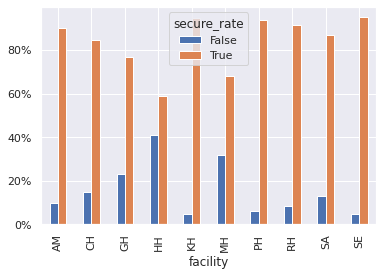

In [26]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

fc_visits.groupby(['facility','secure_rate']).size().groupby(level=0).apply(
    lambda x: 100 * x /  x.sum()
).unstack().plot(kind='bar')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

Facilities: KH, PH and SE have the highest secure rates.

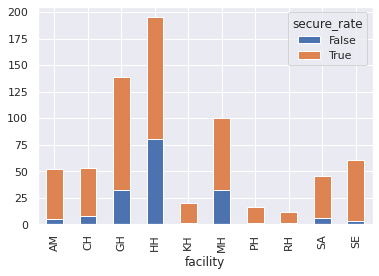

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

fc_visits.groupby(['facility','secure_rate']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

With this stacked bar, it's difficult to know how many visits were not secure and which have been found as secure. I would not recommend this graph for large data.

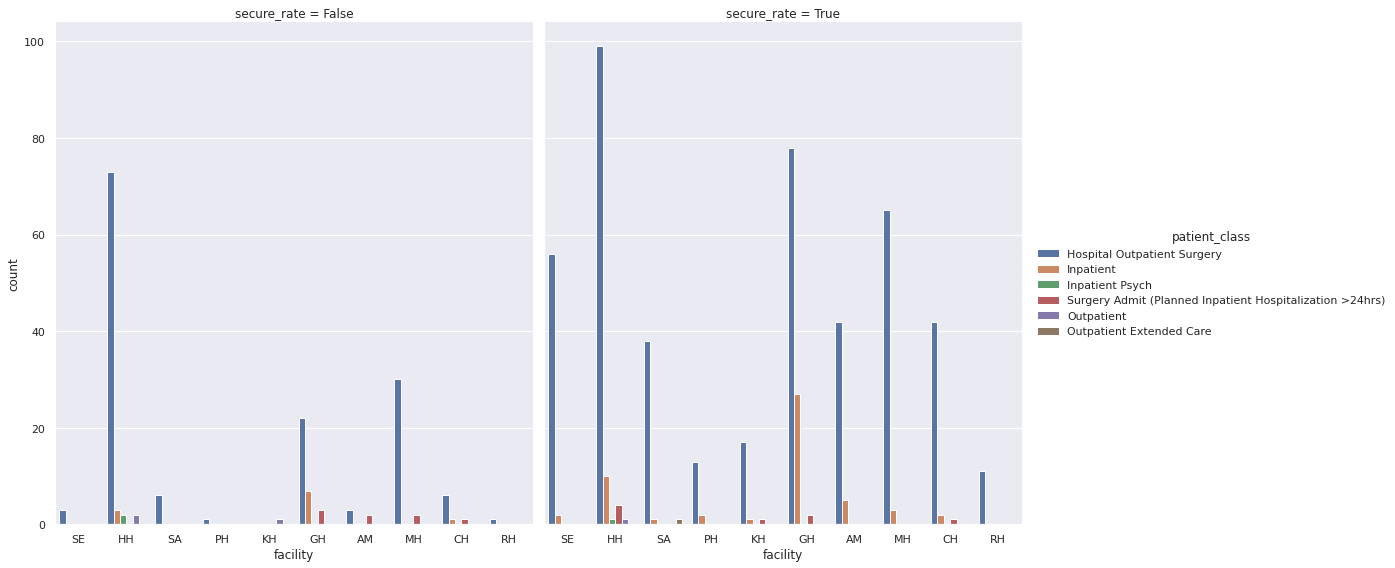

In [28]:
g = sns.catplot(x="facility", hue="patient_class", col="secure_rate",
                data=fc_visits, kind="count",
                height=8, aspect= .9);

This graph is a good representation of accounts that have been found to be secured before the expected date and the count of visits that have not been secured by the expected admission date and we can see which patient class is also found to have a high rate. 

In [29]:
fac_visit = fc_visits.groupby('facility')['visit_number'].count()
fac_visit

facility
AM     52
CH     53
GH    139
HH    195
KH     20
MH    100
PH     16
RH     12
SA     46
SE     61
Name: visit_number, dtype: int64

Above we see a table of the count of all scheduled visits per facility. And below are the count of visits graphed by facilty and the count of visit numbers. Facility HH has the highest amount of visits schedueld.

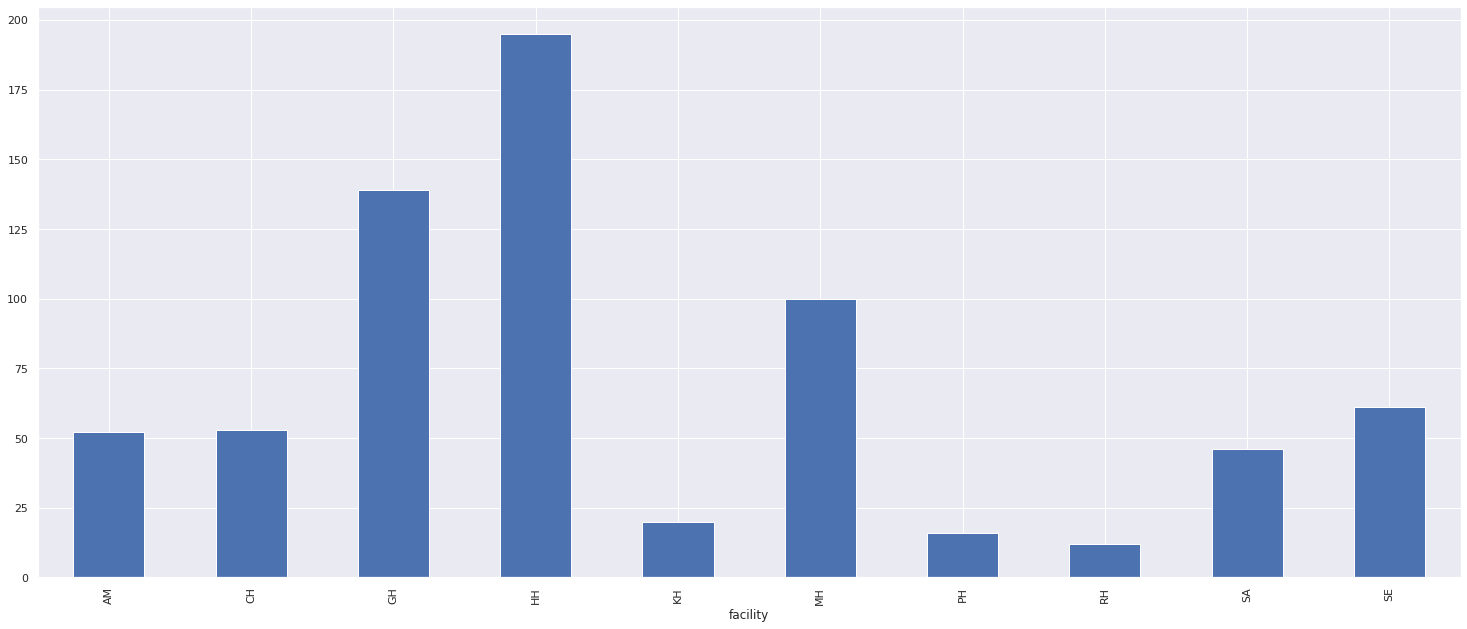

In [30]:
plt.figure(figsize=(25.5,10.5))
fc_visits.groupby('facility')['visit_number'].nunique().plot(kind='bar')
plt.show()

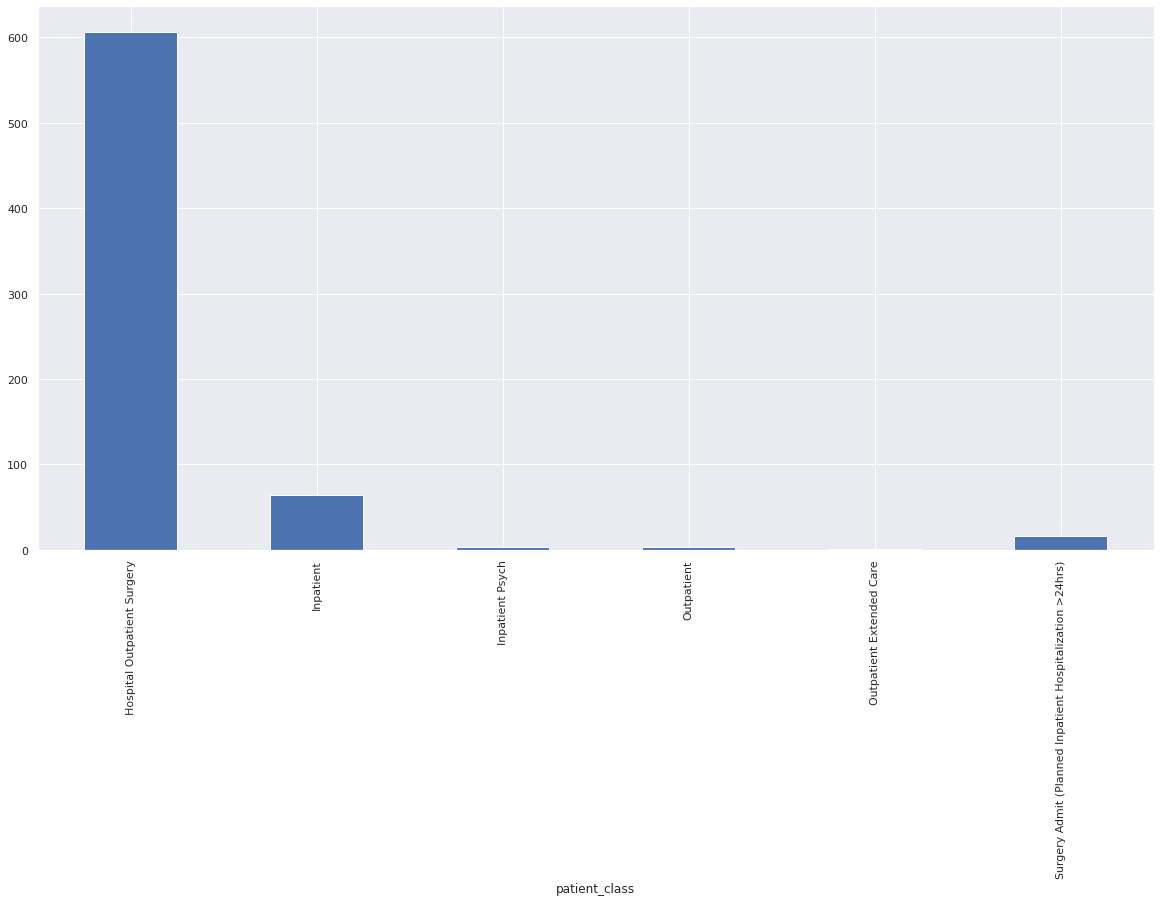

In [33]:
plt.figure(figsize=(20,10))
fc_visits.groupby('patient_class')['visit_number'].nunique().plot(kind='bar')
plt.show()

# CONCLUSION
My data began with a count of 694 rows where I was able to narrow this data down to filter the amount of visits per patient class and by facility. I found that looking at the data by patient class made it much easier to see what is being scheduled the most within our facilities. 
Also, having two graphs side by side showing the count of visits that were found to be secured vs. unsecured could be a good outlook, because although we want to know how well our facilities are able to secure visits we can always use room for imporovement. 